In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('fulldataset_code1.csv')
data.describe()
prod='Citrus Production(hg/ha)'
data=data[data[prod]<1000000]

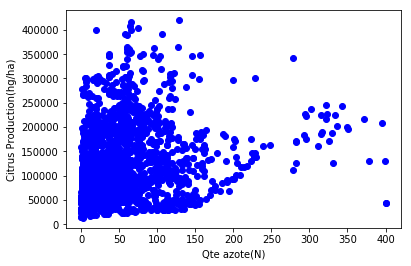

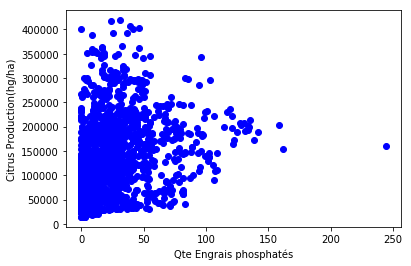

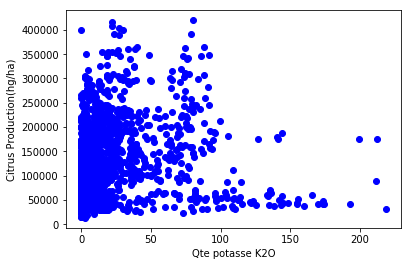

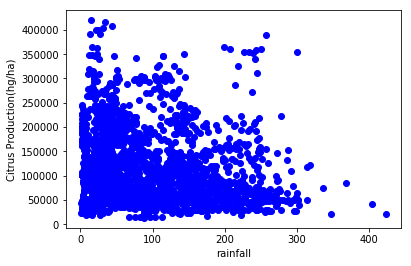

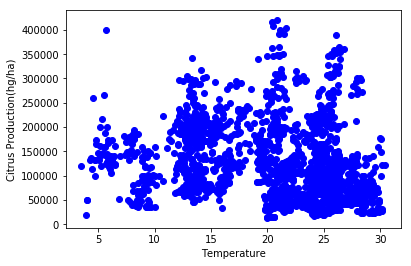

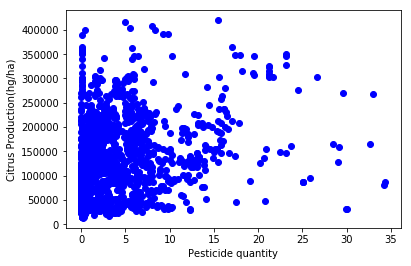

In [3]:
x=['Qte azote(N)','Qte Engrais phosphatés','Qte potasse K2O','rainfall','Temperature','Pesticide quantity']
y='Citrus Production(hg/ha)'
for i in x:
    plt.scatter(data[i],data[y],color='blue')
    plt.xlabel(i)
    plt.ylabel(y)
    plt.show()

In [4]:
#traun test split
full=data
full.drop(columns=['Area','Year'],inplace=True)

In [5]:
 msk = np.random.rand(len(full)) < 0.8
train = full[msk]
test = full[~msk]

In [6]:


train=train[['Area Code','Citrus Production(hg/ha)','rainfall', 'Temperature','Pesticide quantity', 'Qte azote(N)','Qte Engrais phosphatés','Qte potasse K2O']]
test=test[['Area Code','Citrus Production(hg/ha)','rainfall', 'Temperature','Pesticide quantity', 'Qte azote(N)','Qte Engrais phosphatés','Qte potasse K2O']]



In [7]:
from sklearn import metrics   , linear_model
import math

regr=linear_model.LinearRegression(normalize=True)
x = np.asanyarray(train[['Area Code','rainfall', 'Temperature','Pesticide quantity', 'Qte azote(N)','Qte Engrais phosphatés','Qte potasse K2O']])
y=np.asanyarray(train[[ 'Citrus Production(hg/ha)']])
print(regr.fit(x,y))
regr.coef_




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


array([[ -157.60491119,  -222.37119518, -1224.10560248,  3487.82468496,
           21.8377843 ,   935.99488216,  -220.46749282]])

In [9]:
yhat=regr.predict(test[['Area Code','rainfall', 'Temperature','Pesticide quantity', 'Qte azote(N)','Qte Engrais phosphatés','Qte potasse K2O']])
ytest=test[[ 'Citrus Production(hg/ha)']]
import sklearn.metrics as sk
import math

print("R2=",sk.r2_score(ytest,yhat))
print("rmse=",math.sqrt(sk.mean_squared_error(ytest,yhat)))

R2= 0.23838773535343294
rmse= 69810.4556225364
